In [21]:
from bs4 import BeautifulSoup as BS4
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [22]:
cars_df = pd.read_csv(r"C:\Users\ECherepenya\Documents\Jupiter Notebooks\Ford Fiesta price prediction\ford_cars.csv", encoding = 'utf8')
cars_df.drop(['Unnamed: 0','url'], axis=1, inplace=True)

for column in cars_df.columns:
    #print(column)
    if cars_df[column].dtypes == 'object':
        cars_df[column] = cars_df[column].str.strip()
        #print('Done')
    else:
        #print('Pass')
        pass
    
cars_df.drop_duplicates(inplace=True)
cars_df.describe(include='all')

,brand,model,year,price_USD,km,location,fuel,transmission
count,555,555,555.000000,555.000000,555,555,555,555
unique,1,1,NaN,NaN,224,118,29,5
top,Ford,Fiesta,NaN,NaN,150 тис. км,Київ,"Бензин, 1.4 л.",Ручна / Механіка
freq,555,555,NaN,NaN,13,115,84,371
mean,NaN,NaN,2009.371171,7332.581982,NaN,NaN,NaN,NaN
std,NaN,NaN,5.656462,13847.781322,NaN,NaN,NaN,NaN
min,NaN,NaN,1986.000000,400.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,2007.000000,4500.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,2009.000000,5800.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,2013.000000,7800.000000,NaN,NaN,NaN,NaN


In [23]:
cars_df.loc[cars_df['price_USD'] == 222000, 'price_USD'] = 222000/27.3
cars_df.loc[cars_df['price_USD'] == 200000, 'price_USD'] = 200000/27.3
cars_df.loc[cars_df['price_USD'] == 96000, 'price_USD'] = 96000/27.3
cars_df.loc[cars_df['price_USD'] == 89000, 'price_USD'] = 89000/27.3
cars_df.loc[cars_df['price_USD'] == 75000, 'price_USD'] = 75000/27.3
cars_df.price_USD = cars_df.price_USD.astype(int)
cars_df.price_USD.value_counts()

4500     17
5200     16
6500     14
7800     13
4200     13
         ..
8699      1
9099      1
6666      1
3600      1
13300     1
Name: price_USD, Length: 186, dtype: int64

In [24]:
cars_df['km'] = cars_df['km'].str.replace(' тис. км', '').astype(int)
cars_df.km.value_counts()

150    13
180    10
130     9
151     8
170     8
       ..
182     1
184     1
203     1
204     1
4       1
Name: km, Length: 224, dtype: int64

In [25]:
cars_df['fuel'] = cars_df['fuel'].str.replace(' л.', '')
cars_df[['fuel','volume']] = cars_df['fuel'].str.split(', ', 1, expand=True)
cars_df.loc[(cars_df.fuel.isin(['1.25', '1.3'])), 'fuel'] = "Бензин"
cars_df.loc[(cars_df.fuel == 'Газ / Бензин'), 'fuel'] = "LPG"
cars_df.loc[(cars_df.fuel == 'Бензин'), 'fuel'] = "petrol"
cars_df.loc[(cars_df.fuel == 'Дизель'), 'fuel'] = "diesel"
cars_df.loc[(cars_df.fuel == 'Не вказано'), 'fuel'] = np.nan

cars_df.fuel.value_counts()

petrol    400
diesel     77
LPG        75
Name: fuel, dtype: int64

In [26]:
cars_df['volume'] = cars_df['volume'].str.strip()
cars_df['volume'] = cars_df['volume'].astype(float)

cars_df.describe()

,year,price_USD,km,volume
count,555.000000,555.000000,555.000000,516.000000
mean,2009.371171,6148.762162,141.713514,1.341027
std,5.656462,2402.410179,74.931009,0.193566
min,1986.000000,400.000000,4.000000,0.960000
25%,2007.000000,4500.000000,97.000000,1.200000
50%,2009.000000,5800.000000,136.000000,1.400000
75%,2013.000000,7800.000000,180.000000,1.400000
max,2019.000000,25000.000000,990.000000,2.000000


In [27]:
cars_df.loc[(cars_df['transmission'] == 'Ручна / Механіка'), 'transmission'] = 'manual'
cars_df.loc[(cars_df['transmission'] == 'Автомат'), 'transmission'] = 'automatic'
cars_df.loc[cars_df['transmission'] == 'Типтронік', 'transmission'] = 'automatic'
cars_df.loc[cars_df['transmission'] == 'Робот', 'transmission'] = 'robotic'
cars_df.loc[cars_df['transmission'] == 'Не вказано', 'transmission'] = np.nan
cars_df.transmission.value_counts()

manual       371
automatic    118
robotic       31
Name: transmission, dtype: int64

In [28]:
cars_df.dropna(inplace=True)

In [29]:
cars_df = pd.get_dummies(cars_df, columns=['fuel','transmission'], prefix=['fuel','trans'])
cars_df.head()

,brand,model,year,price_USD,km,location,volume,fuel_LPG,fuel_diesel,fuel_petrol,trans_automatic,trans_manual,trans_robotic
0,Ford,Fiesta,2012,8131,98,Київ,1.60,0,0,1,1,0,0
1,Ford,Fiesta,2012,7500,121,Дніпро (Дніпропетровськ),1.20,1,0,0,0,1,0
2,Ford,Fiesta,2012,8499,48,Дніпро (Дніпропетровськ),1.25,0,0,1,0,1,0
3,Ford,Fiesta,2016,9700,77,Одеса,1.25,0,0,1,0,1,0
4,Ford,Fiesta,2018,7600,90,Одеса,1.60,0,0,1,1,0,0


In [30]:
cars_df.drop(['fuel_petrol','trans_manual'], inplace=True, axis=1)
cars_df.head()

,brand,model,year,price_USD,km,location,volume,fuel_LPG,fuel_diesel,trans_automatic,trans_robotic
0,Ford,Fiesta,2012,8131,98,Київ,1.60,0,0,1,0
1,Ford,Fiesta,2012,7500,121,Дніпро (Дніпропетровськ),1.20,1,0,0,0
2,Ford,Fiesta,2012,8499,48,Дніпро (Дніпропетровськ),1.25,0,0,0,0
3,Ford,Fiesta,2016,9700,77,Одеса,1.25,0,0,0,0
4,Ford,Fiesta,2018,7600,90,Одеса,1.60,0,0,1,0


In [31]:
cars_df = cars_df[cars_df['year'] > 2000]
cars = cars_df._get_numeric_data()
cars.describe()

,year,price_USD,km,volume,fuel_LPG,fuel_diesel,trans_automatic,trans_robotic
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,2010.491342,6438.032468,135.800866,1.343745,0.136364,0.147186,0.242424,0.058442
std,4.101602,2073.571815,60.295255,0.192172,0.343546,0.354675,0.429014,0.234831
min,2002.000000,1400.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,4662.250000,96.250000,1.250000,0.000000,0.000000,0.000000,0.000000
50%,2011.000000,6225.000000,132.000000,1.400000,0.000000,0.000000,0.000000,0.000000
75%,2013.000000,7957.750000,177.000000,1.400000,0.000000,0.000000,0.000000,0.000000
max,2019.000000,15000.000000,324.000000,2.000000,1.000000,1.000000,1.000000,1.000000


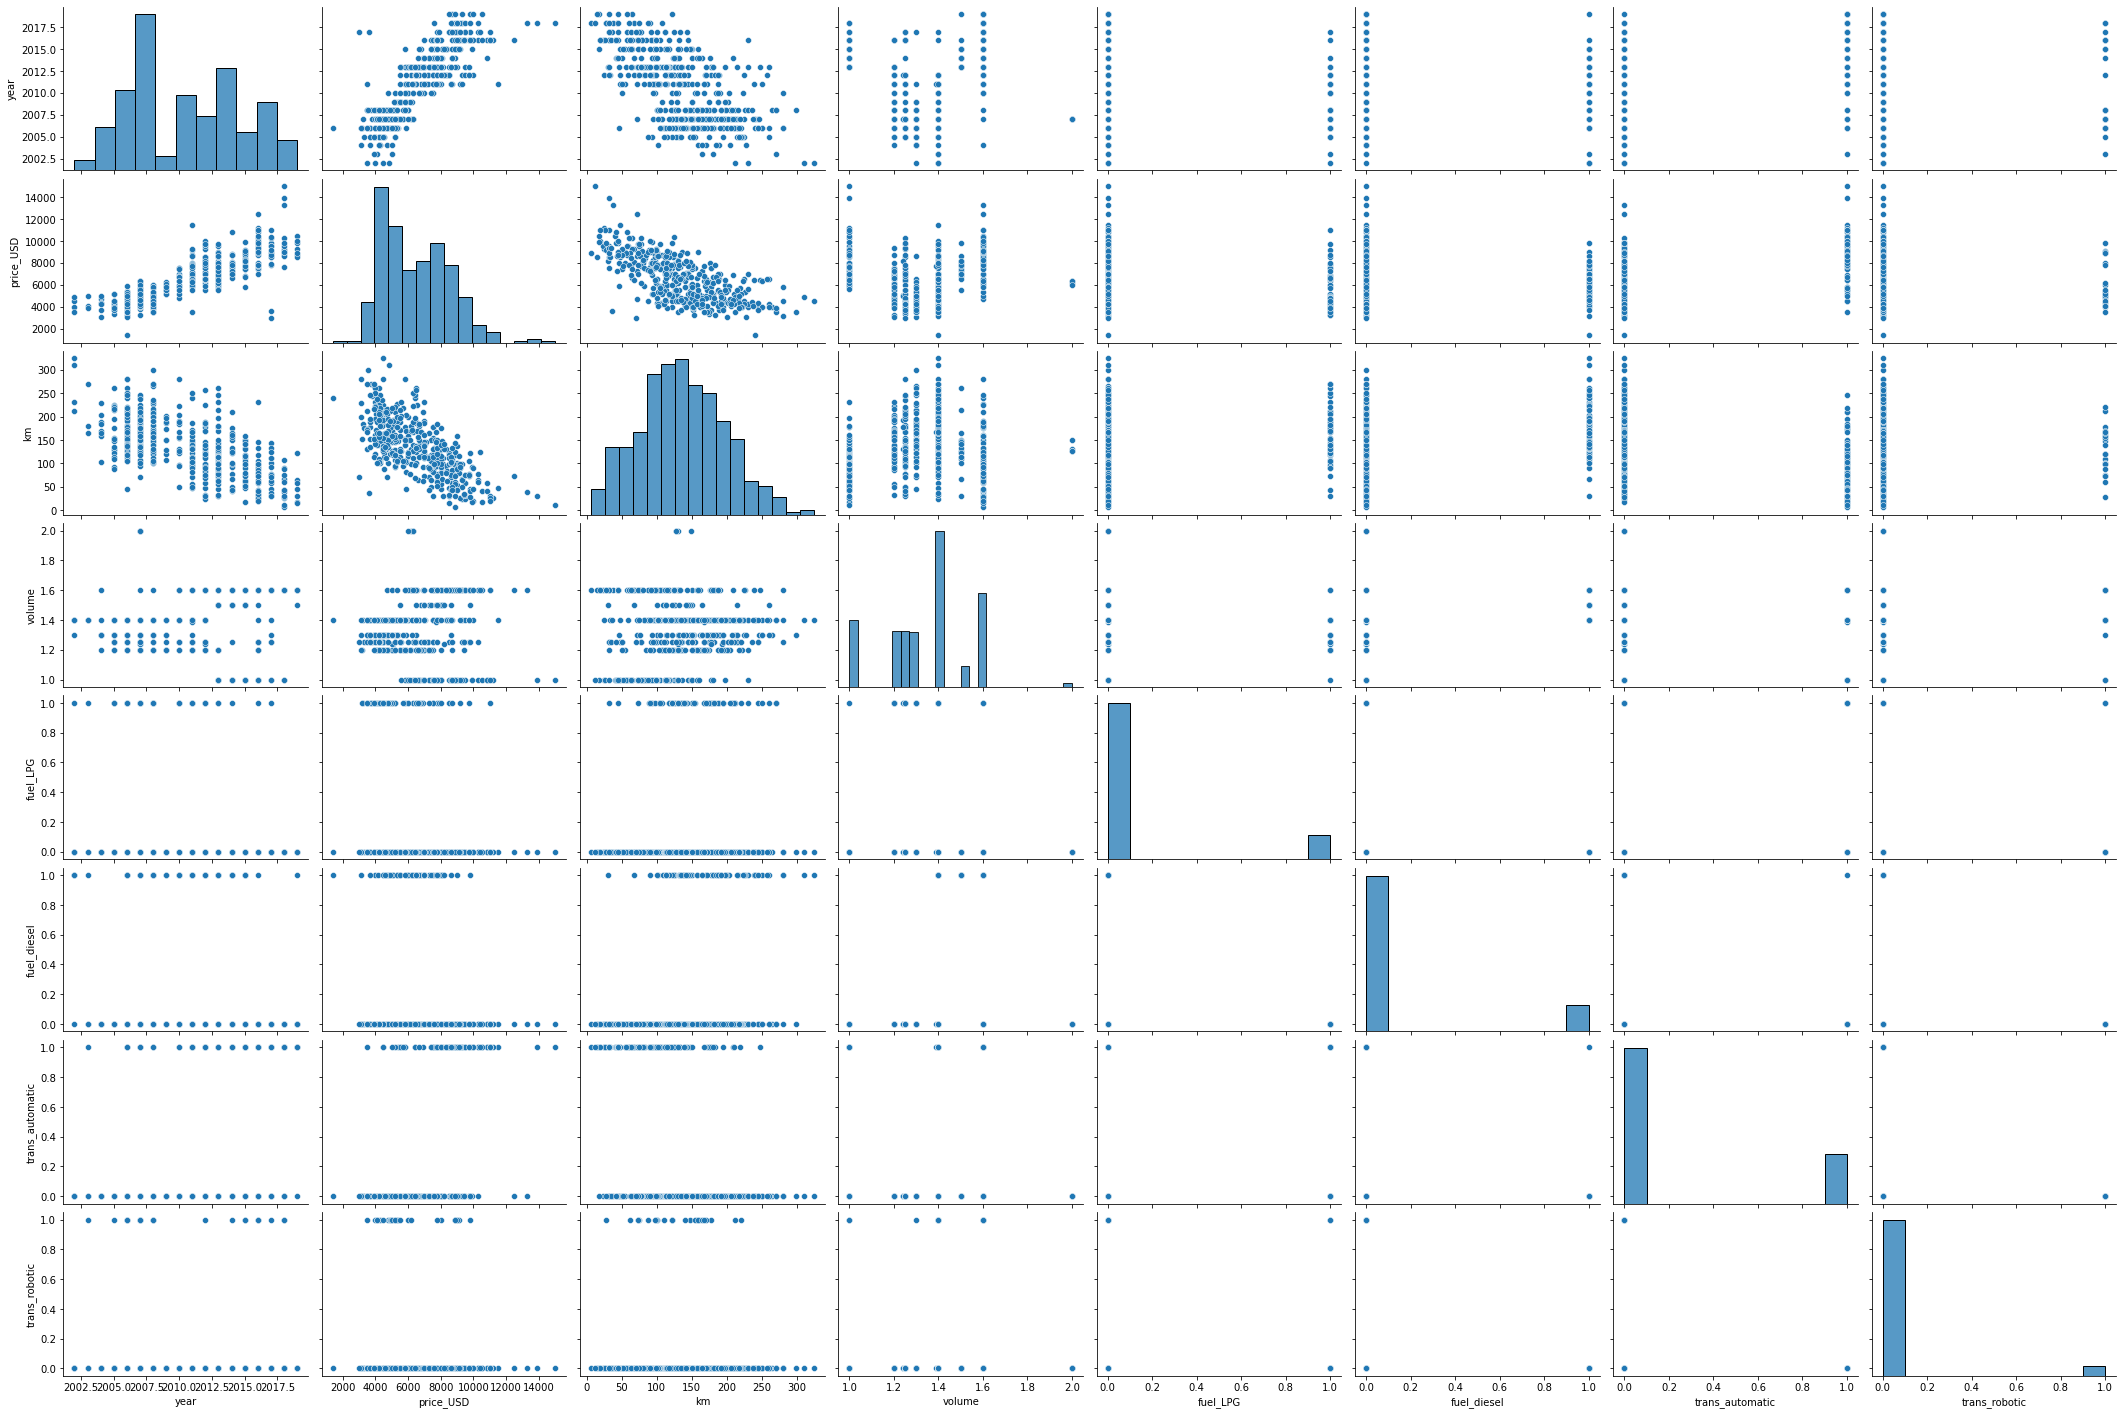

In [32]:
sns.pairplot(cars, aspect = 1.5)

In [33]:
y_data = cars['price_USD']
#x_data = cars.drop('price_USD', axis = 1)
x_data = cars.drop(['price_USD', 'volume'], axis = 1)
x_data.columns

Index(['year', 'km', 'fuel_LPG', 'fuel_diesel', 'trans_automatic',
       'trans_robotic'],
      dtype='object')

In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 139
number of training samples: 323


In [44]:
lr = LinearRegression(normalize=False)
lr.fit(x_train, y_train)
print("R2 train:", lr.score(x_train, y_train))
print("R2 test:", lr.score(x_test, y_test))

R2 train: 0.8015737200596487
R2 test: 0.7504393888990194


In [45]:
print(lr.intercept_)
print(lr.coef_)

-595283.8801778218
[299.77555263  -9.1492985  -58.23474017 282.76035061 816.86876254
 117.97270482]


In [46]:
# 'year', 'km', 'fuel_LPG', 'fuel_diesel', 'trans_automatic', 'trans_robotic'
print("Car price:", int(lr.predict([[2011, 107, 0, 0, 1, 0]])[0]))

Car price: 7402


C:\Users\ECherepenya\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ECherepenya\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


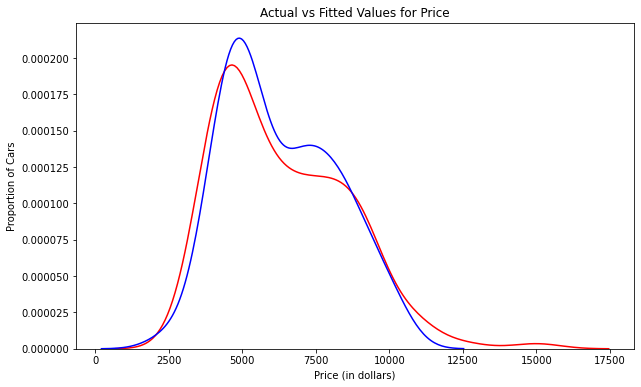

In [47]:
y_test_predicted = lr.predict(x_test)
plt.figure(figsize=(10, 6))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_test_predicted, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [48]:
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

poly = LinearRegression()
poly.fit(x_train_pr, y_train)

y_test_pr_predicted = poly.predict(x_test_pr)
#print("Predicted values:", y_test_pr_predicted[0:4])
#print("True values:", y_test[0:4].values)

print("R2 train:", poly.score(x_train_pr, y_train))
print("R2 test:", poly.score(x_test_pr, y_test))

R2 train: 0.8208380043120018
R2 test: 0.7499198046558219


In [50]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

from sklearn.linear_model import Ridge
RidgeModel=Ridge(alpha=10)
RidgeModel.fit(x_train_pr, y_train)

y_ridge = RidgeModel.predict(x_test_pr)
#print('predicted:', y_ridge[0:4])
#print('test set :', y_test[0:4].values)
print("R2 train:", RidgeModel.score(x_train_pr, y_train))
print("R2 test:", RidgeModel.score(x_test_pr, y_test))

#['year', 'km', 'volume', 'fuel_LPG', 'fuel_diesel', 'fuel_petrol', 'trans_automatic', 'trans_manual', 'trans_robotic']
my_ford_data_pr = pr.fit_transform([[2011, 107, 0, 0, 1, 0]])
price_pr = RidgeModel.predict(my_ford_data_pr)
print("Car price: ", int(price_pr[0]))

R2 train: 0.809330325261342
R2 test: 0.7559177514631715
Car price:  7272


C:\Users\ECherepenya\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ECherepenya\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


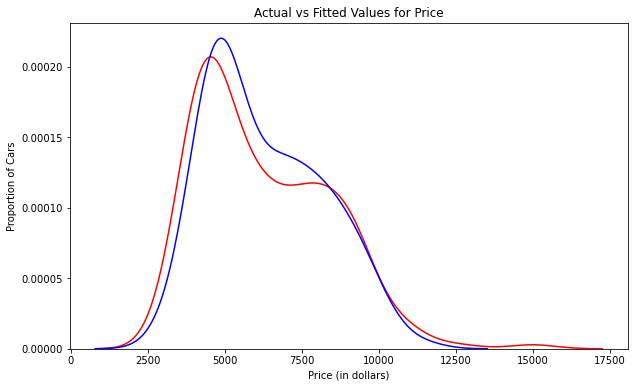

In [20]:
y_test_predicted = RidgeModel.predict(x_test_pr)
plt.figure(figsize=(10, 6))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_test_predicted, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [51]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)

from sklearn.model_selection import GridSearchCV
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000], 'normalize': [False, True]}]
RR=Ridge()
Grid1 = GridSearchCV(RR, parameters1,cv=4)
Grid1.fit(x_train_pr, y_train)
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [52]:
print("R2 train:", BestRR.score(x_train_pr, y_train))
print("R2 test:", BestRR.score(x_test_pr, y_test))

R2 train: 0.8091360116125715
R2 test: 0.7567642612359725


In [53]:
my_ford_data_pr = pr.fit_transform([[2011, 107, 0, 0, 1, 0]])
price_pr = BestRR.predict(my_ford_data_pr)
print("Car price: ", int(price_pr[0]))

Car price:  7275


C:\Users\ECherepenya\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ECherepenya\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


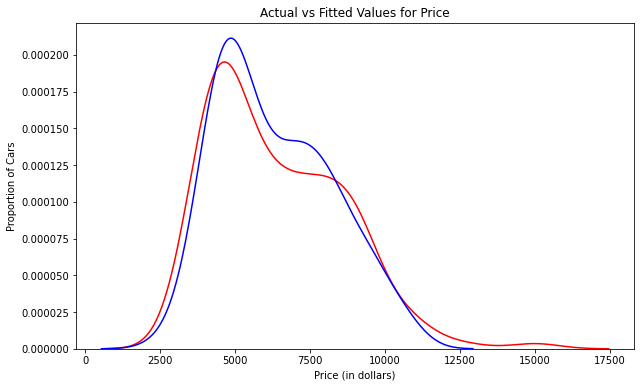

In [54]:
y_test_predicted = BestRR.predict(x_test_pr)
plt.figure(figsize=(10, 6))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_test_predicted, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()